<div align="center">
<p align="center" style="width: 100%;">
    <img src="https://raw.githubusercontent.com/vlm-run/.github/refs/heads/main/profile/assets/vlm-black.svg" alt="VLM Run Logo" width="80" style="margin-bottom: -5px; color: #2e3138; vertical-align: middle; padding-right: 5px;"><br>
</p>
<h2>Cookbook</h2>
<p align="center"><a href="https://docs.vlm.run"><b>Website</b></a> | <a href="https://docs.vlm.run/"><b>API Docs</b></a> | <a href="https://docs.vlm.run/blog"><b>Blog</b></a> | <a href="https://discord.gg/AMApC2UzVY"><b>Discord</b></a>
</p>
<p align="center">
<a href="https://discord.gg/AMApC2UzVY"><img alt="Discord" src="https://img.shields.io/badge/discord-chat-purple?color=%235765F2&label=discord&logo=discord"></a>
<a href="https://twitter.com/vlmrun"><img alt="Twitter Follow" src="https://img.shields.io/twitter/follow/vlmrun.svg?style=social&logo=twitter"></a>
</p>
</div>

Welcome to the [VLM Run](https://vlm.run) Colab Cookbook! This notebook serves as an example to help developers leverage the power of Vision Language Models (VLMs) for visual ETL.


### Environment Setup

To get started, install the VLM Run Python SDK and sign-up for an API key on the [VLM Run App](https://app.vlm.run).
- Store the VLM Run API key under the `VLM_RUN_API_KEY` environment variable.

### Install Dependencies

In [ ]:
%pip install "vlmrun[all]"

### Initialize the VLM Run Client

In [ ]:
from vlmrun.client import VLMRun


client = VLMRun()
client

In [53]:
# Let's check if the API is online
client.healthcheck()

True

### Read dashcam videos

For this example, we're going to be using sample dashcam videos from the [`nexar-ai/nexar_collision_prediction`](https://huggingface.co/datasets/nexar-ai/nexar_collision_prediction) dataset on Hugging Face.


In [54]:
from pathlib import Path

import pandas as pd
from PIL import Image
from vlmrun.common.utils import download_artifact
from vlmrun.common.image import encode_image
from vlmrun.common.video import VideoReader

In [55]:
# Download sample dashcam video
# For convenience, we've uploaded a subset of the videos from the dataset to the VLM Run public bucket.

URLS = [
    "https://storage.googleapis.com/vlm-data-public-prod/hub/examples/video.dashcam/01130.mp4",
    "https://storage.googleapis.com/vlm-data-public-prod/hub/examples/video.dashcam/00900.mp4",
    "https://storage.googleapis.com/vlm-data-public-prod/hub/examples/video.dashcam/01205.mp4",
    "https://storage.googleapis.com/vlm-data-public-prod/hub/examples/video.dashcam/01153.mp4",
    "https://storage.googleapis.com/vlm-data-public-prod/hub/examples/video.dashcam/01122.mp4",
    "https://storage.googleapis.com/vlm-data-public-prod/hub/examples/video.dashcam/00914.mp4",
    "https://storage.googleapis.com/vlm-data-public-prod/hub/examples/video.dashcam/01153.mp4",
    "https://storage.googleapis.com/vlm-data-public-prod/hub/examples/video.dashcam/01122.mp4",
    "https://storage.googleapis.com/vlm-data-public-prod/hub/examples/video.dashcam/00896.mp4",
    "https://storage.googleapis.com/vlm-data-public-prod/hub/examples/video.dashcam/00895.mp4",
]

paths = []
for url in URLS:
    path: Path = download_artifact(url, format="file")
    print(f"Downloaded video [path={path.name}, size={path.stat().st_size / 1024 / 1024:.2f} MB]")
    paths.append({"url": url, "path": path})

Downloaded video [path=01130.mp4, size=19.69 MB]
Downloaded video [path=00900.mp4, size=23.95 MB]
Downloaded video [path=01205.mp4, size=23.15 MB]
Downloaded video [path=01153.mp4, size=18.33 MB]
Downloaded video [path=01122.mp4, size=20.80 MB]
Downloaded video [path=00914.mp4, size=13.00 MB]
Downloaded video [path=01153.mp4, size=18.33 MB]
Downloaded video [path=01122.mp4, size=20.80 MB]
Downloaded video [path=00896.mp4, size=17.54 MB]
Downloaded video [path=00895.mp4, size=17.32 MB]


In [56]:
# Create a dataframe and load the first image from each video
df = pd.DataFrame(paths)
df["image"] = df["path"].apply(lambda x: Image.fromarray(VideoReader(x)[0]))
df

,url,path,image
0,https://storage.googleapis.com/vlm-data-public...,/Users/sudeep/.vlmrun/cache/downloads/01130.mp4,<PIL.Image.Image image mode=RGB size=1280x720 ...
1,https://storage.googleapis.com/vlm-data-public...,/Users/sudeep/.vlmrun/cache/downloads/00900.mp4,<PIL.Image.Image image mode=RGB size=1280x720 ...
2,https://storage.googleapis.com/vlm-data-public...,/Users/sudeep/.vlmrun/cache/downloads/01205.mp4,<PIL.Image.Image image mode=RGB size=1280x720 ...
3,https://storage.googleapis.com/vlm-data-public...,/Users/sudeep/.vlmrun/cache/downloads/01153.mp4,<PIL.Image.Image image mode=RGB size=1280x720 ...
4,https://storage.googleapis.com/vlm-data-public...,/Users/sudeep/.vlmrun/cache/downloads/01122.mp4,<PIL.Image.Image image mode=RGB size=1280x720 ...
5,https://storage.googleapis.com/vlm-data-public...,/Users/sudeep/.vlmrun/cache/downloads/00914.mp4,<PIL.Image.Image image mode=RGB size=1280x720 ...
6,https://storage.googleapis.com/vlm-data-public...,/Users/sudeep/.vlmrun/cache/downloads/01153.mp4,<PIL.Image.Image image mode=RGB size=1280x720 ...
7,https://storage.googleapis.com/vlm-data-public...,/Users/sudeep/.vlmrun/cache/downloads/01122.mp4,<PIL.Image.Image image mode=RGB size=1280x720 ...
8,https://storage.googleapis.com/vlm-data-public...,/Users/sudeep/.vlmrun/cache/downloads/00896.mp4,<PIL.Image.Image image mode=RGB size=1280x720 ...
9,https://storage.googleapis.com/vlm-data-public...,/Users/sudeep/.vlmrun/cache/downloads/00895.mp4,<PIL.Image.Image image mode=RGB size=1280x720 ...


### Visualize the first image from each video

,url,image
0,https://storage.googleapis.com/vlm-data-public-prod/hub/examples/video.dashcam/01130.mp4,
1,https://storage.googleapis.com/vlm-data-public-prod/hub/examples/video.dashcam/00900.mp4,
2,https://storage.googleapis.com/vlm-data-public-prod/hub/examples/video.dashcam/01205.mp4,
3,https://storage.googleapis.com/vlm-data-public-prod/hub/examples/video.dashcam/01153.mp4,
4,https://storage.googleapis.com/vlm-data-public-prod/hub/examples/video.dashcam/01122.mp4,
5,https://storage.googleapis.com/vlm-data-public-prod/hub/examples/video.dashcam/00914.mp4,
6,https://storage.googleapis.com/vlm-data-public-prod/hub/examples/video.dashcam/01153.mp4,
7,https://storage.googleapis.com/vlm-data-public-prod/hub/examples/video.dashcam/01122.mp4,
8,https://storage.googleapis.com/vlm-data-public-prod/hub/examples/video.dashcam/00896.mp4,
9,https://storage.googleapis.com/vlm-data-public-prod/hub/examples/video.dashcam/00895.mp4,

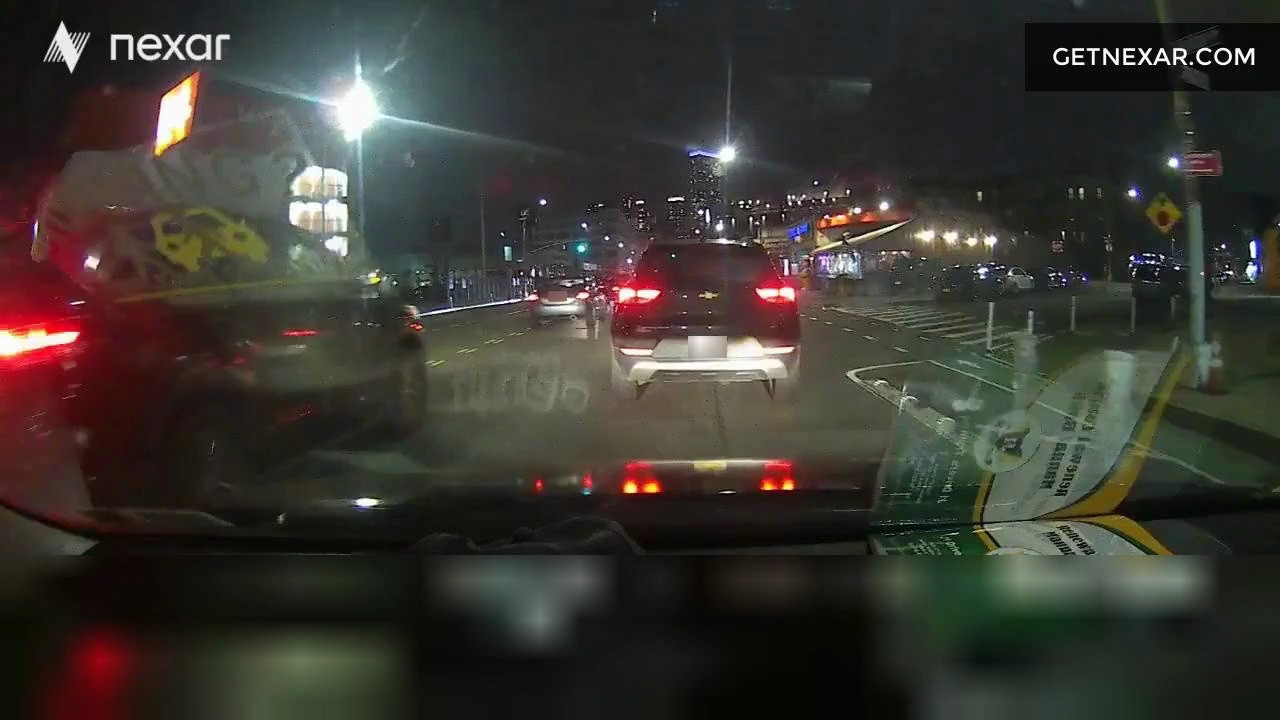
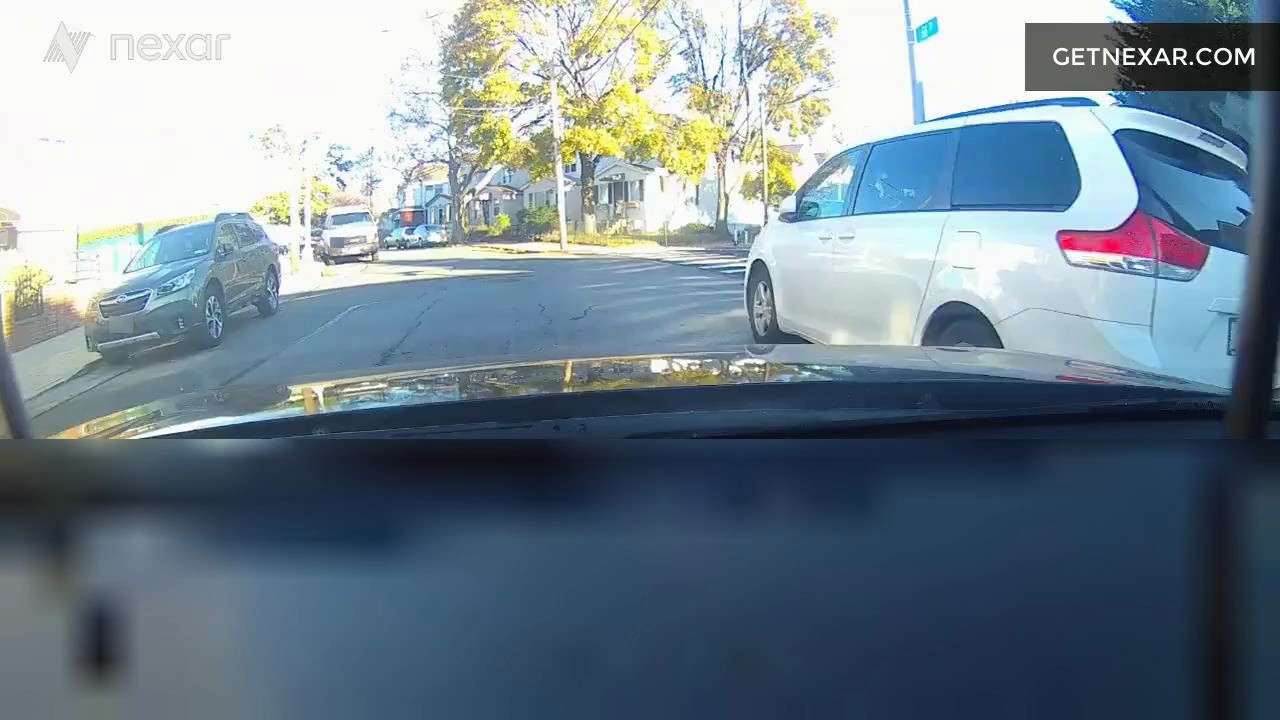
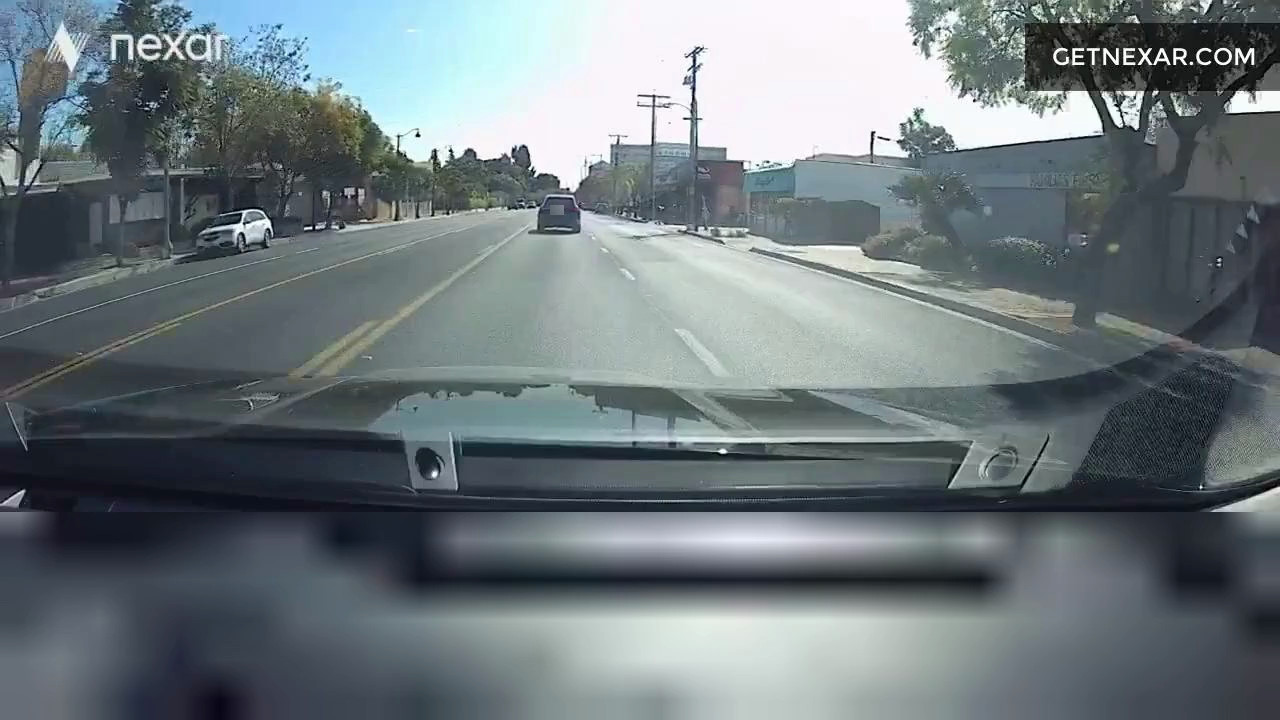
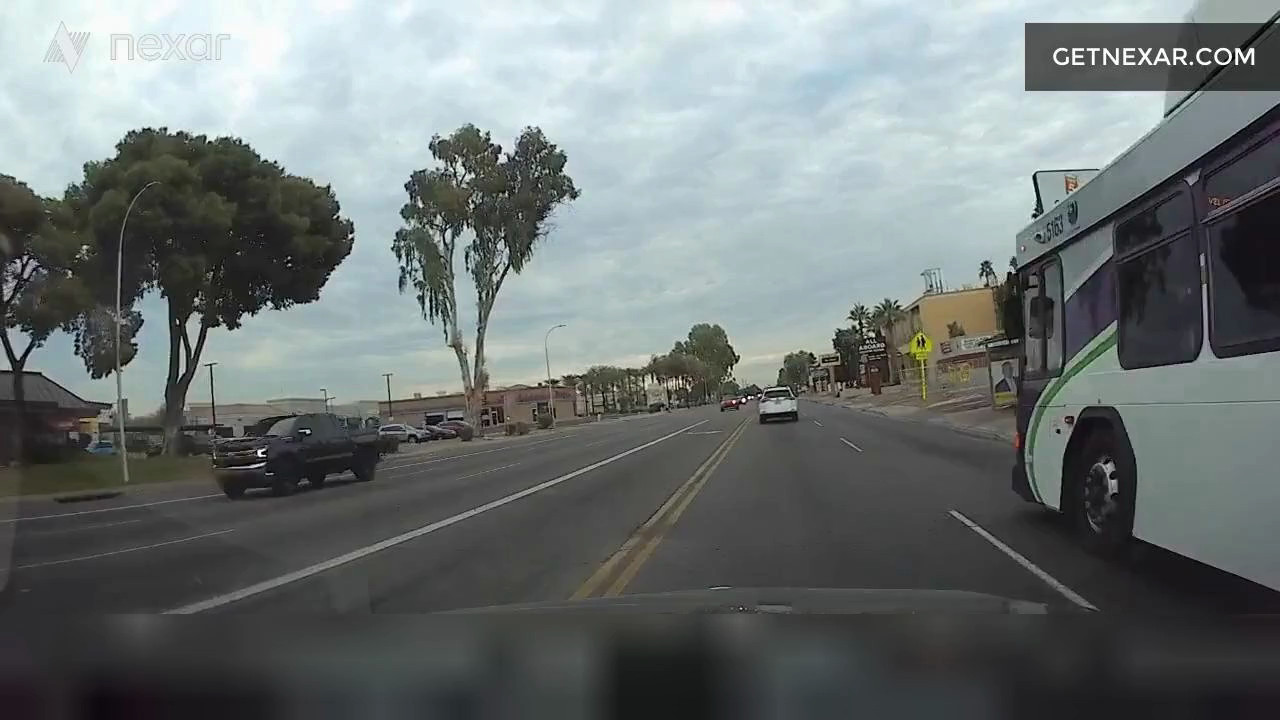
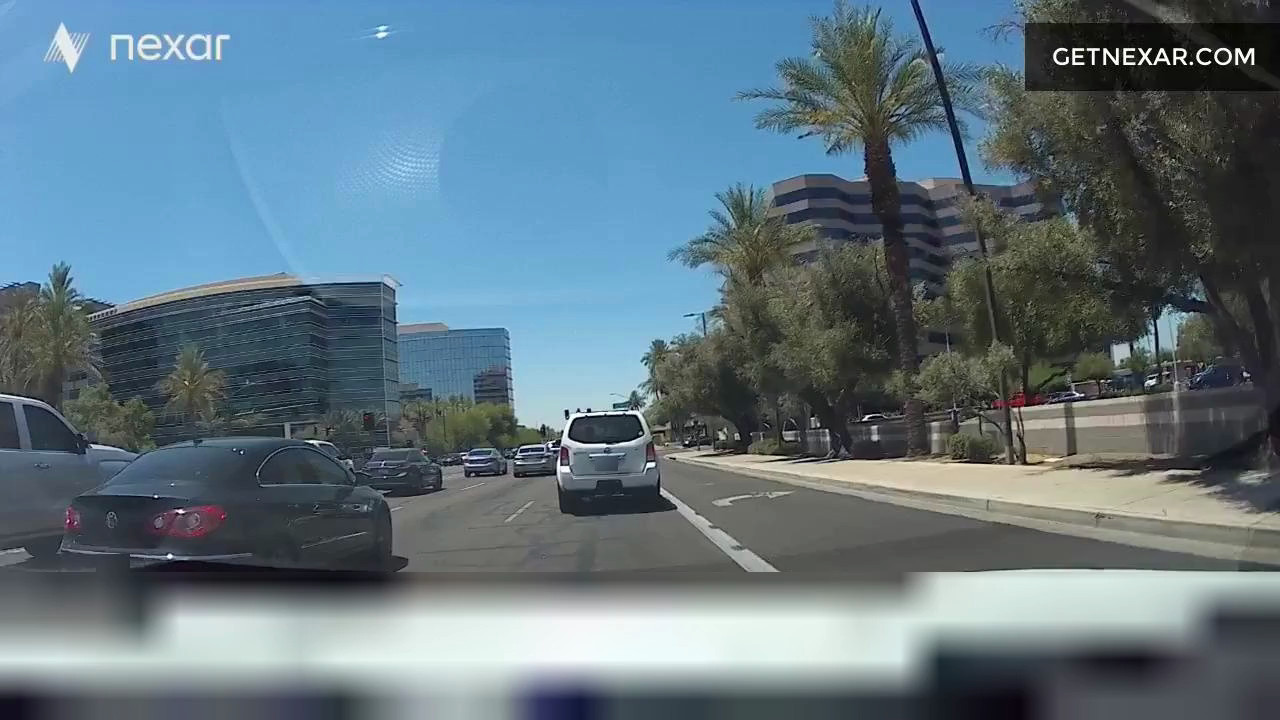
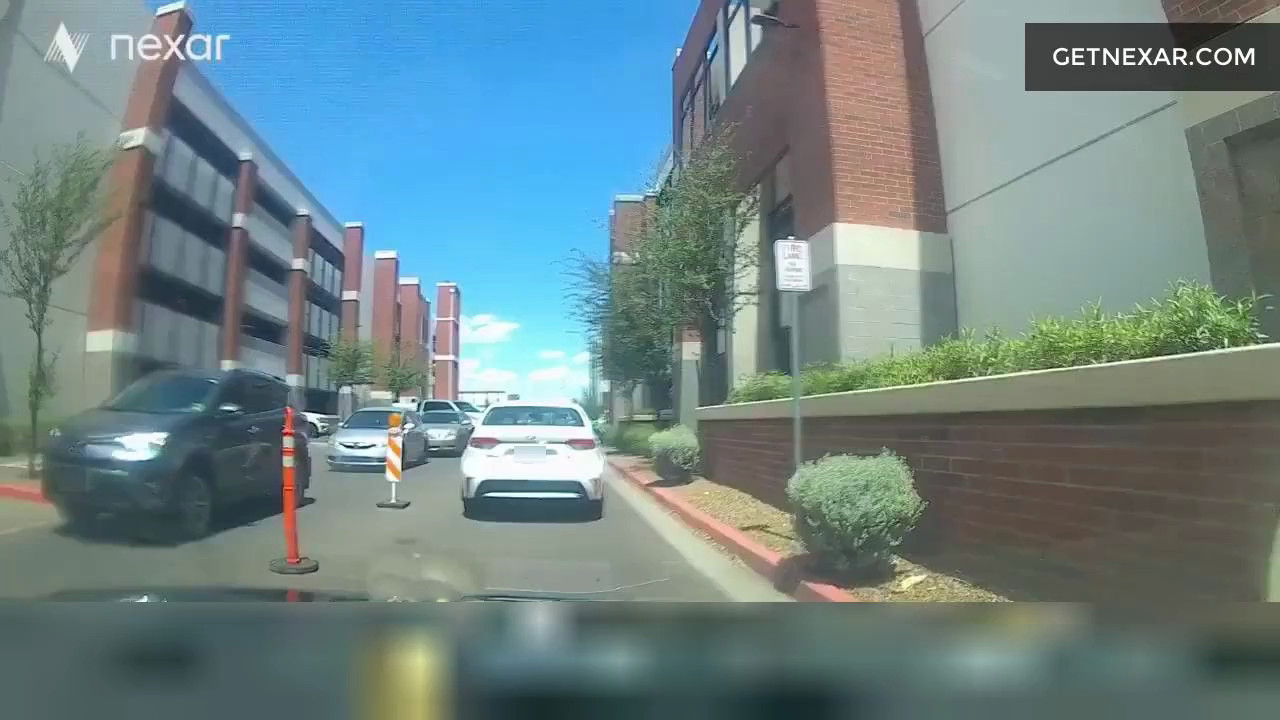
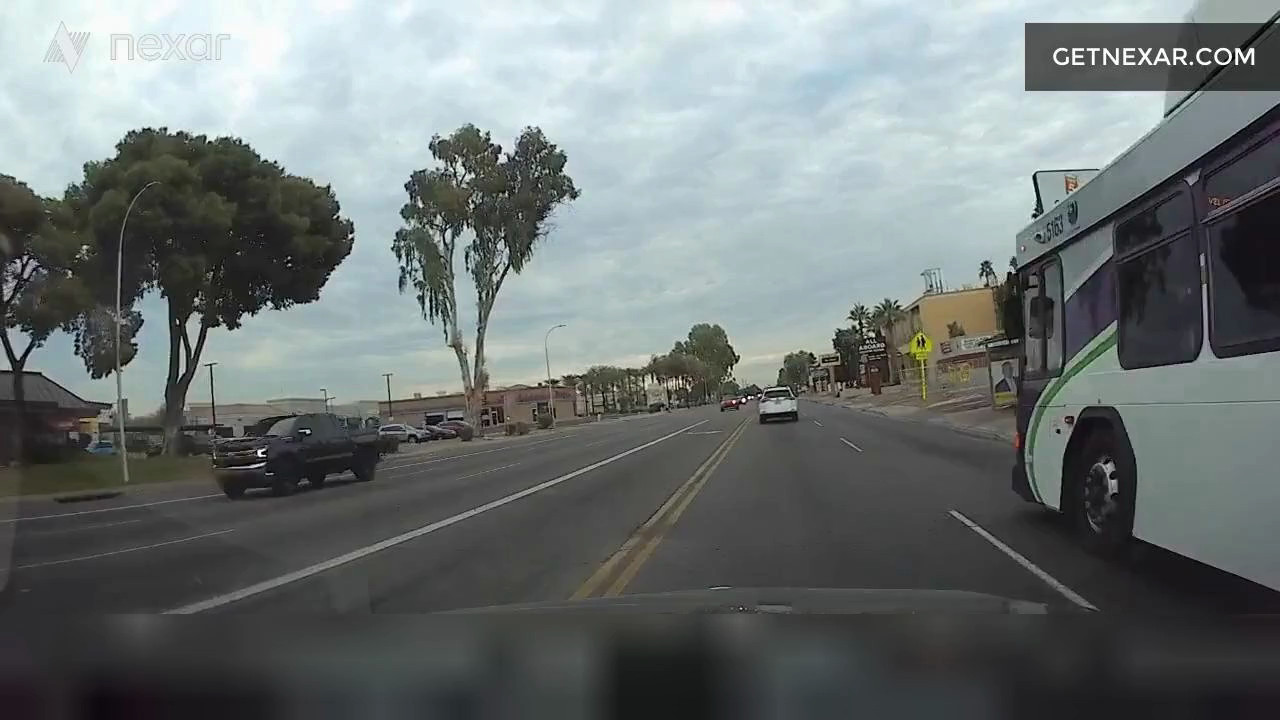
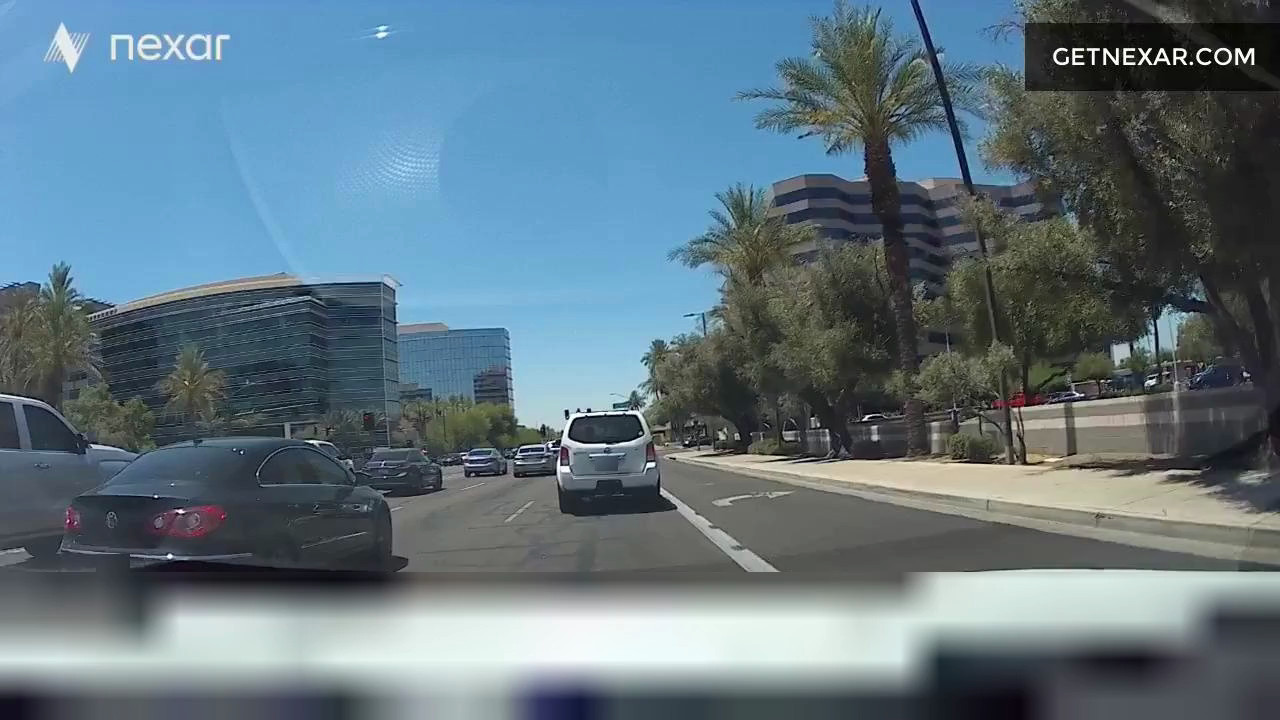
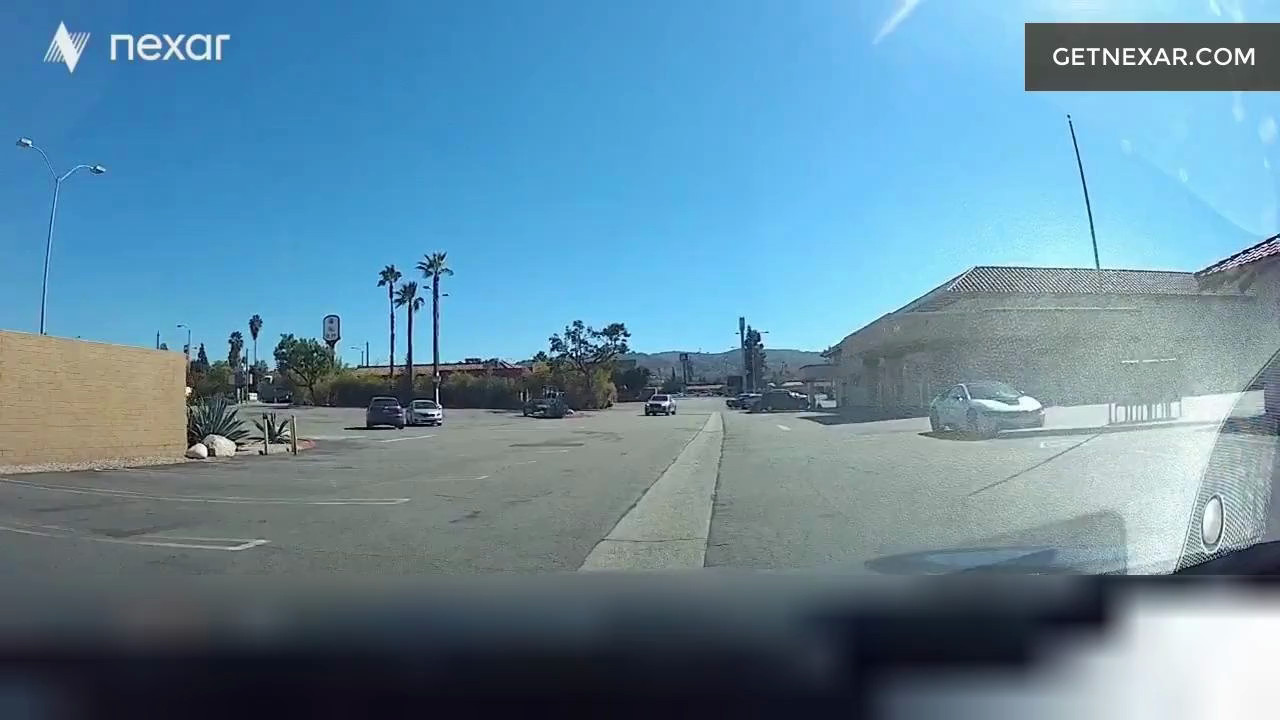
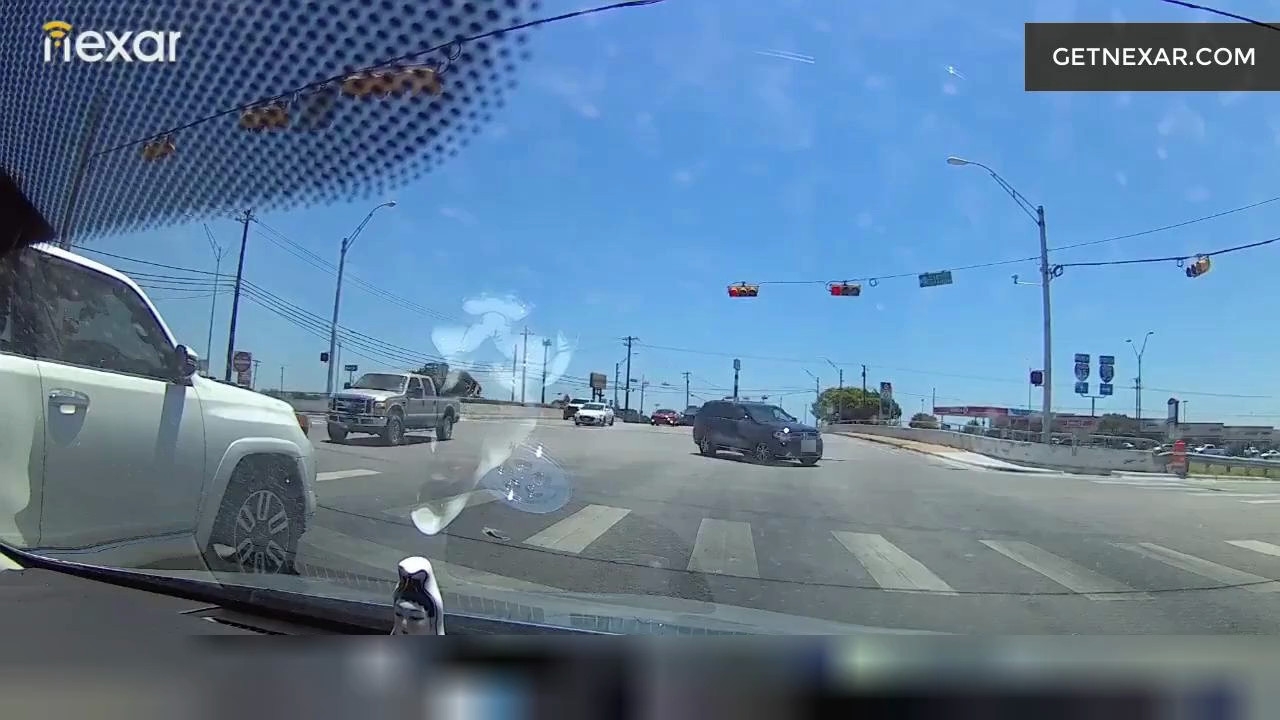

In [59]:
from IPython.display import HTML, display

formatters = {"image": lambda x: f"<img src='{encode_image(x, format='JPEG')}' width='400'>"}
display(HTML(df[["url", "image"]].to_html(formatters=formatters, escape=False)))

### Extract JSON from each of the videos

Now, let's use the VLM Run API to extract structured data from each of the videos. In this example, we're going to be defining a custom Pydantic model called `VideoDashcam` to extract the following structured data from each of the videos:

```python

class VideoDashcam(BaseModel):
    description: str = Field(..., description="2-3 sentence description of the dashcam scene")
    scene: Literal["highway", "sub-urban", "urban", "industrial", "other"] = Field(
        ..., description="Scene classification of the dashcam video"
    )
    weather: Literal["clear", "cloudy", "rainy", "snowy", "other"] = Field(
        ..., description="Weather classification of the dashcam video"
    )
    light_conditions: Literal["normal", "dark", "twilight", "bright", "other"] = Field(
        ..., description="Lighting conditions of the dashcam video"
    )
```

**Fields**:
- `description`: A 2-3 sentence description of the dashcam scene
- `scene`: The scene classification of the dashcam video
- `weather`: The weather classification of the dashcam video
- `light_conditions`: The lighting conditions of the dashcam video

**Features**:
 - **Video Captioning**: The `description` field is an open-ended string prediction, that can be used to describe the scene contents in the video.
 - **Video Classification**: The `scene`, `weather`, and `light_conditions` fields are categorical predictions (defined by `Literal`s) that can be used to classify the scene contents in the video. By providing the `Literal` values, the VLM Run API will adhere to only the provided categories, enabling traditional classification tasks over a fixed taxonomy.


In [61]:
from typing import Literal
from pydantic import BaseModel, Field
from vlmrun.client.types import GenerationConfig


class VideoDashcam(BaseModel):
    description: str = Field(..., description="2-3 sentence description of the dashcam scene")
    scene: Literal["highway", "sub-urban", "urban", "industrial", "other"] = Field(
        ..., description="Scene classification of the dashcam video"
    )
    weather: Literal["clear", "cloudy", "rainy", "snowy", "other"] = Field(
        ..., description="Weather classification of the dashcam video"
    )
    light_conditions: Literal["normal", "dark", "twilight", "bright", "other"] = Field(
        ..., description="Lighting conditions of the dashcam video"
    )

### Generate structured data from a dashcam video

Let's use a model we've fine-tuned to extract JSON from each of the dashcam videos, in the Pydantic model defined above. 

> For convenience, we've defined a simple `generate` function that wraps the VLM Run API's `generate` method with a try-except block to handle any extraction errors.

In [69]:
from tenacity import retry, stop_after_attempt

# Extract structured data using the custom `json_schema` argument
model = "ft:vlm-1:vlm-run:20250217-669217f1-nexar-dashcam-v1"

def generate(video: Path):
    """Generate structured data from a dashcam video using the VLM Run API."""

    @retry(stop=stop_after_attempt(3), reraise=True)
    def _generate(video: Path):
        return client.fine_tuning.generate(
            videos=[video], 
            model=model,
            config=GenerationConfig(
                prompt=f"Extract the details from the dashcam video.", 
                temperature=0.1, 
                max_tokens=2048, 
                json_schema=VideoDashcam.model_json_schema()
            ),
        )

    # Generate JSON from the video, with retry logic
    try:
        return _generate(video)
    except Exception as e:
        print(f"Error generating structured data from video {video}: {e}")
        return None

# Generate structured data from each of the dashcam videos
df_response = df.assign(
    response=lambda x: x["path"].apply(lambda video: generate(video))
)

In [70]:
# Display the dataframe (with images, and the VLM Run response)
df_response

,url,path,image,response
0,https://storage.googleapis.com/vlm-data-public-prod/hub/examples/video.dashcam/01130.mp4,/Users/sudeep/.vlmrun/cache/downloads/01130.mp4,<PIL.Image.Image image mode=RGB size=1280x720 at 0x32E97D5D0>,"id='c3b2dc69-31d7-4b97-a570-91aae75b2349' created_at=datetime.datetime(2025, 2, 19, 0, 4, 12, 360755, tzinfo=TzInfo(UTC)) completed_at=datetime.datetime(2025, 2, 19, 0, 4, 18, 855792, tzinfo=TzInfo(UTC)) response={'description': 'The video shows a nighttime urban driving scene, with the camera positioned inside a vehicle moving through city streets. The road is illuminated by streetlights and the headlights of other vehicles, creating a dynamic interplay of light and shadow. The environment is characterized by tall buildings, crosswalks, and various signs, indicating a bustling metropolitan area.', 'scene': 'urban', 'weather': 'clear', 'light_conditions': 'dark'} status='completed' usage=CreditUsage(elements_processed=1, element_type='image', credits_used=2)"
1,https://storage.googleapis.com/vlm-data-public-prod/hub/examples/video.dashcam/00900.mp4,/Users/sudeep/.vlmrun/cache/downloads/00900.mp4,<PIL.Image.Image image mode=RGB size=1280x720 at 0x368883A30>,"id='d1cabeb1-e1b5-43ff-89e4-daaa2301c17e' created_at=datetime.datetime(2025, 2, 19, 0, 4, 20, 648798, tzinfo=TzInfo(UTC)) completed_at=datetime.datetime(2025, 2, 19, 0, 4, 26, 585561, tzinfo=TzInfo(UTC)) response={'description': 'The dashcam footage shows a residential street with parked cars on both sides and a few moving vehicles. The road is lined with houses, trees, and sidewalks, indicating a suburban setting.', 'scene': 'sub-urban', 'weather': 'clear', 'light_conditions': 'bright'} status='completed' usage=CreditUsage(elements_processed=1, element_type='image', credits_used=2)"
2,https://storage.googleapis.com/vlm-data-public-prod/hub/examples/video.dashcam/01205.mp4,/Users/sudeep/.vlmrun/cache/downloads/01205.mp4,<PIL.Image.Image image mode=RGB size=1280x720 at 0x368882E60>,"id='d896c03a-8417-4648-80ae-cb9cb93221dc' created_at=datetime.datetime(2025, 2, 19, 0, 4, 28, 410728, tzinfo=TzInfo(UTC)) completed_at=datetime.datetime(2025, 2, 19, 0, 4, 33, 533671, tzinfo=TzInfo(UTC)) response={'description': 'The dashcam footage shows a vehicle driving through a suburban area on a clear day, with light traffic and some pedestrians visible.', 'scene': 'sub-urban', 'weather': 'clear', 'light_conditions': 'bright'} status='completed' usage=CreditUsage(elements_processed=1, element_type='image', credits_used=2)"
3,https://storage.googleapis.com/vlm-data-public-prod/hub/examples/video.dashcam/01153.mp4,/Users/sudeep/.vlmrun/cache/downloads/01153.mp4,<PIL.Image.Image image mode=RGB size=1280x720 at 0x368882C20>,"id='a8258a68-25f4-4356-b4dd-f6ff285aab6a' created_at=datetime.datetime(2025, 2, 19, 0, 4, 34, 620416, tzinfo=TzInfo(UTC)) completed_at=datetime.datetime(2025, 2, 19, 0, 4, 39, 975506, tzinfo=TzInfo(UTC)) response={'description': 'The video shows a dashcam view of a car driving through a suburban area during the day. The road is lined with palm trees and residential buildings, indicating a calm neighborhood setting.', 'scene': 'sub-urban', 'weather': 'cloudy', 'light_conditions': 'normal'} status='completed' usage=CreditUsage(elements_processed=1, element_type='image', credits_used=2)"
4,https://storage.googleapis.com/vlm-data-public-prod/hub/examples/video.dashcam/01122.mp4,/Users/sudeep/.vlmrun/cache/downloads/01122.mp4,<PIL.Image.Image image mode=RGB size=1280x720 at 0x368883AF0>,"id='dc17b1d8-3c62-4a45-8f10-8828370a2b7d' created_at=datetime.datetime(2025, 2, 19, 0, 4, 41, 522923, tzinfo=TzInfo(UTC)) completed_at=datetime.datetime(2025, 2, 19, 0, 4, 47, 238562, tzinfo=TzInfo(UTC)) response={'description': 'The dashcam footage shows a clear day with bright sunlight illuminating a busy urban street lined with modern buildings, palm trees, and various commercial establishments.', 'scene': 'urban', 'weather': 'clear', 'light_conditions': 'bright'} statu

,image,response.description,response.scene,response.weather,response.light_conditions
0,,"The video shows a nighttime urban driving scene, with the camera positioned inside a vehicle moving through city streets. The road is illuminated by streetlights and the headlights of other vehicles, creating a dynamic interplay of light and shadow. The environment is characterized by tall buildings, crosswalks, and various signs, indicating a bustling metropolitan area.",urban,clear,dark
1,,"The dashcam footage shows a residential street with parked cars on both sides and a few moving vehicles. The road is lined with houses, trees, and sidewalks, indicating a suburban setting.",sub-urban,clear,bright
2,,"The dashcam footage shows a vehicle driving through a suburban area on a clear day, with light traffic and some pedestrians visible.",sub-urban,clear,bright
3,,"The video shows a dashcam view of a car driving through a suburban area during the day. The road is lined with palm trees and residential buildings, indicating a calm neighborhood setting.",sub-urban,cloudy,normal
4,,"The dashcam footage shows a clear day with bright sunlight illuminating a busy urban street lined with modern buildings, palm trees, and various commercial establishments.",urban,clear,bright
5,,"The dashcam footage shows a white car driving through a residential area with multi-story buildings on both sides. The street is lined with parked cars and some greenery, indicating a calm suburban environment.",sub-urban,clear,bright
6,,"The video shows a dashcam view of a car driving through a suburban area during the day. The road is lined with palm trees and residential buildings, indicating a calm neighborhood setting.",sub-urban,cloudy,normal
7,,"The dashcam footage shows a clear day with bright sunlight illuminating a busy urban street lined with modern buildings, palm trees, and various commercial establishments.",urban,clear,bright
8,,"The dashcam footage shows a clear day with bright sunlight, as the vehicle drives through a suburban area with palm trees and commercial buildings.",sub-urban,clear,bright
9,,"The dashcam footage shows a vehicle driving through an urban intersection under clear skies, with moderate traffic and a mix of vehicles including cars and trucks.",urban,clear,bright

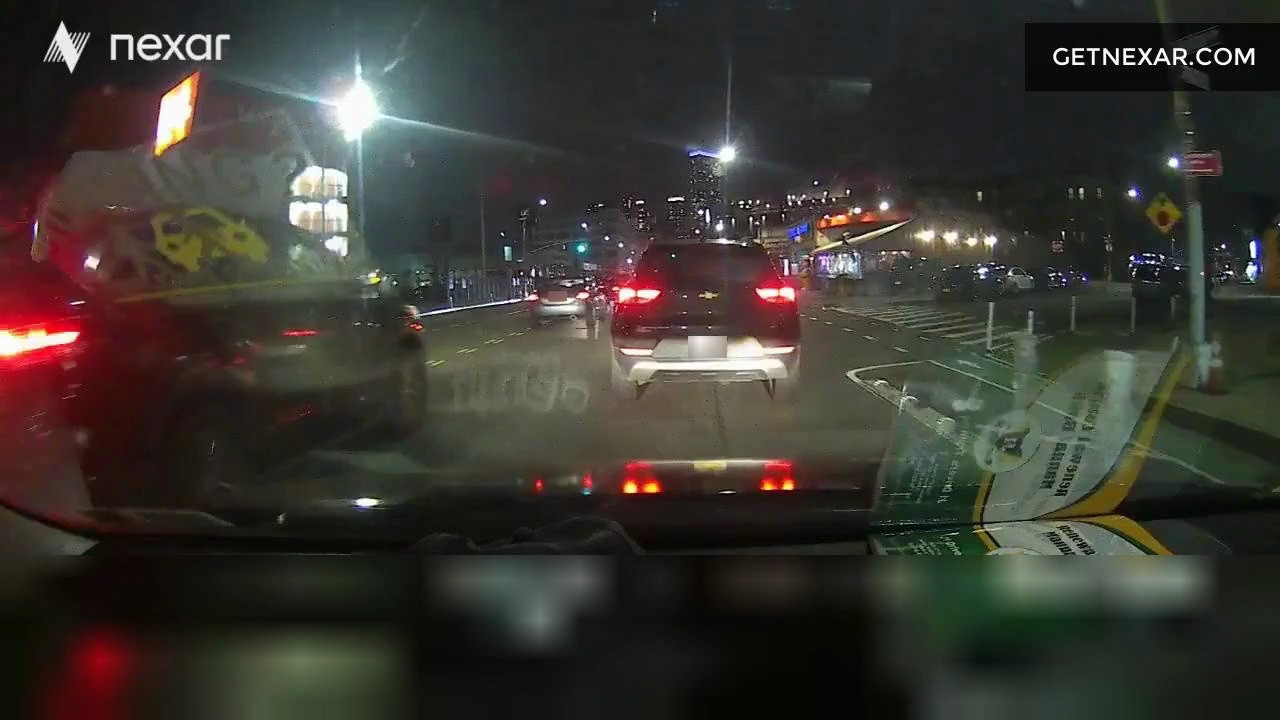
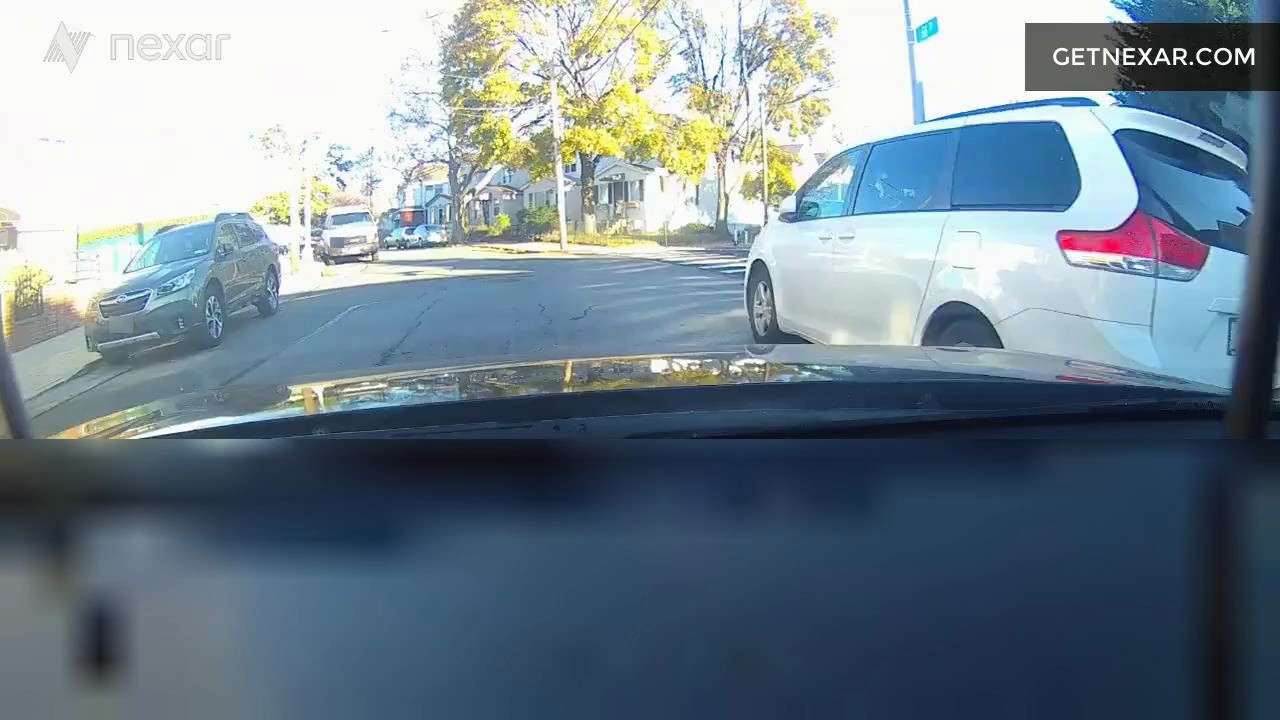
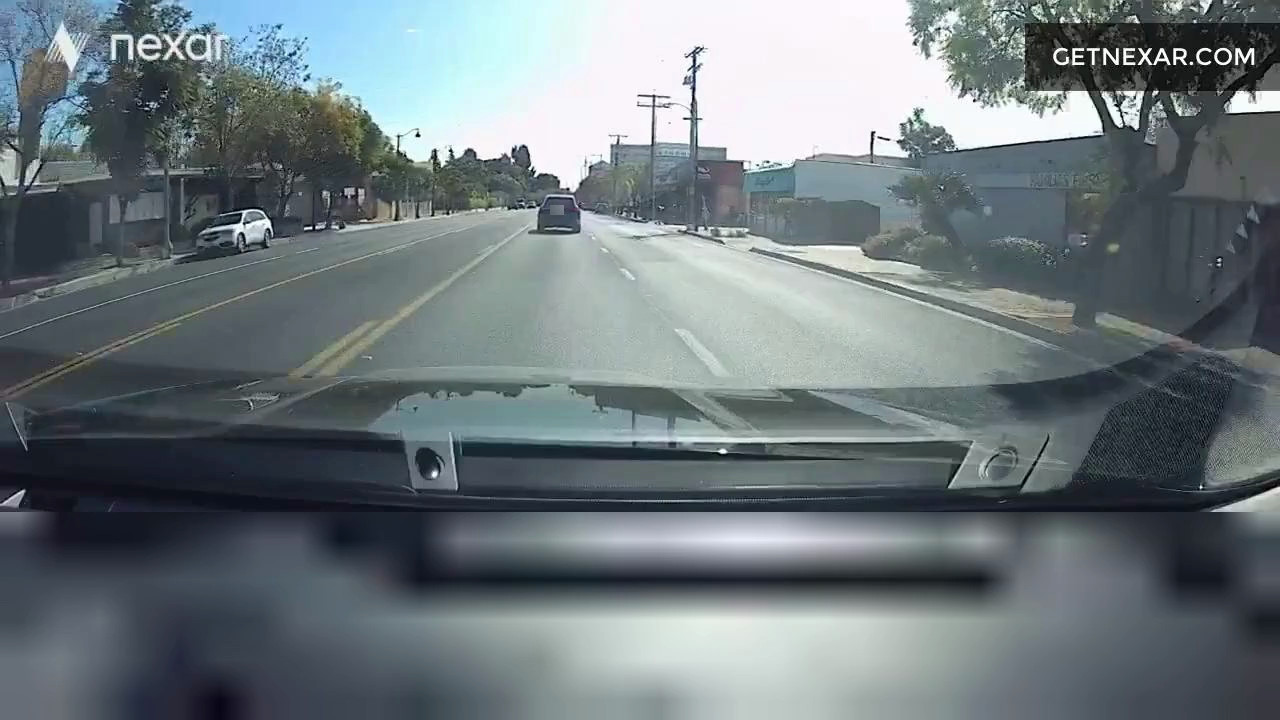
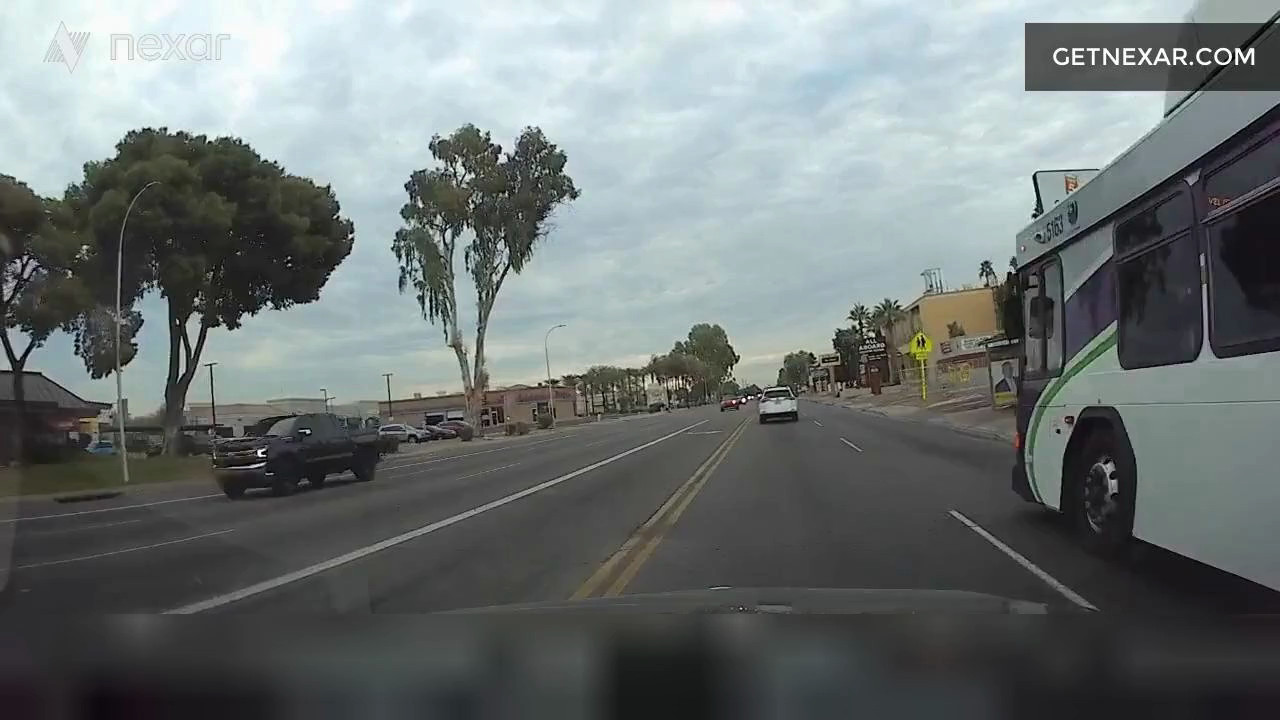
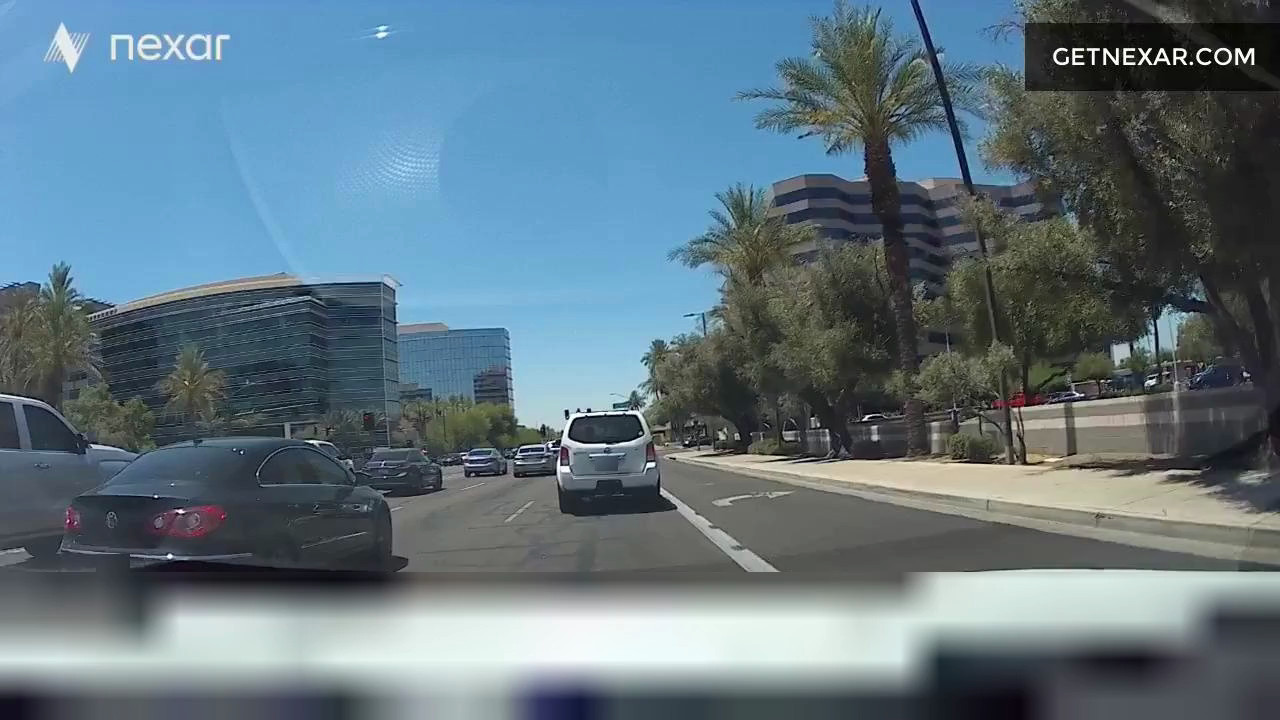
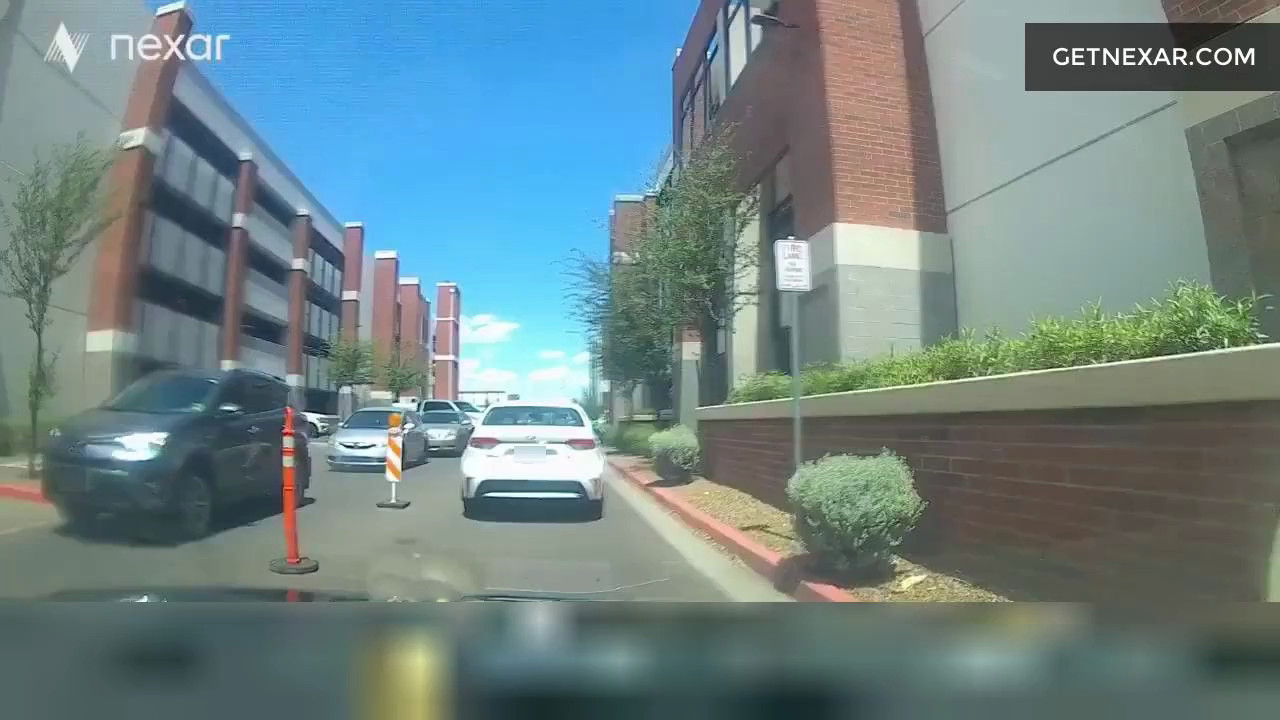
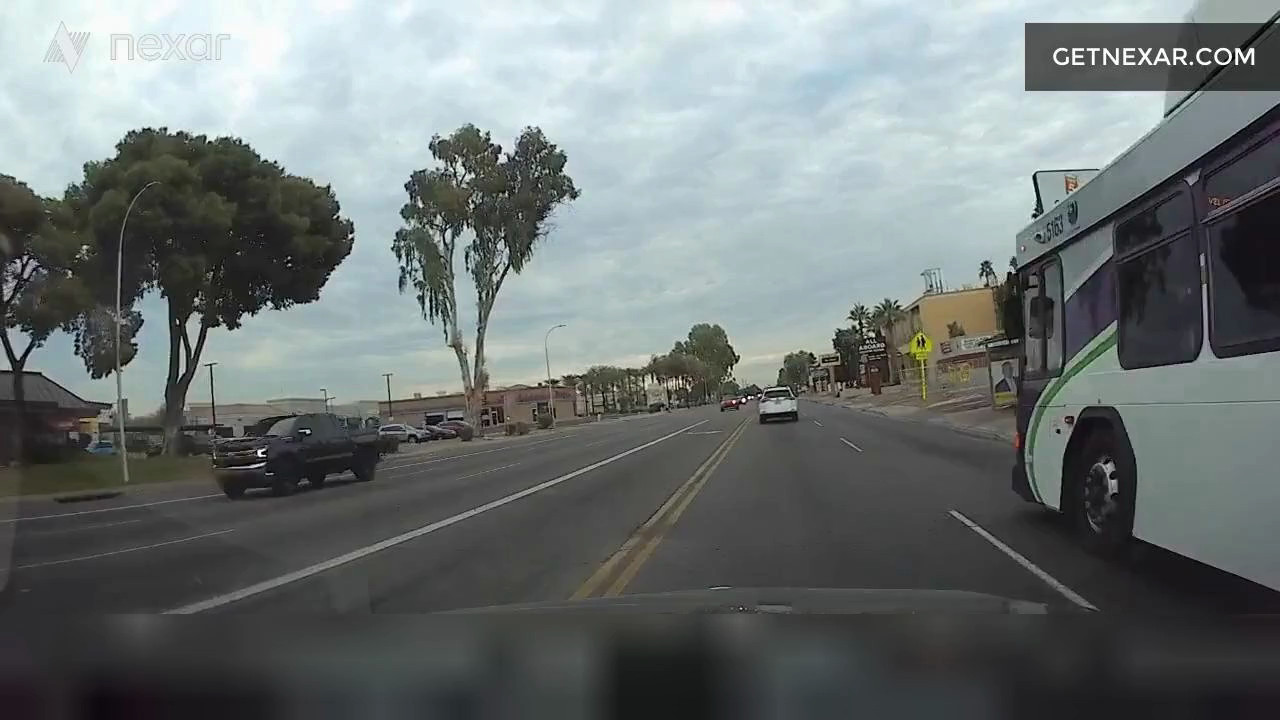
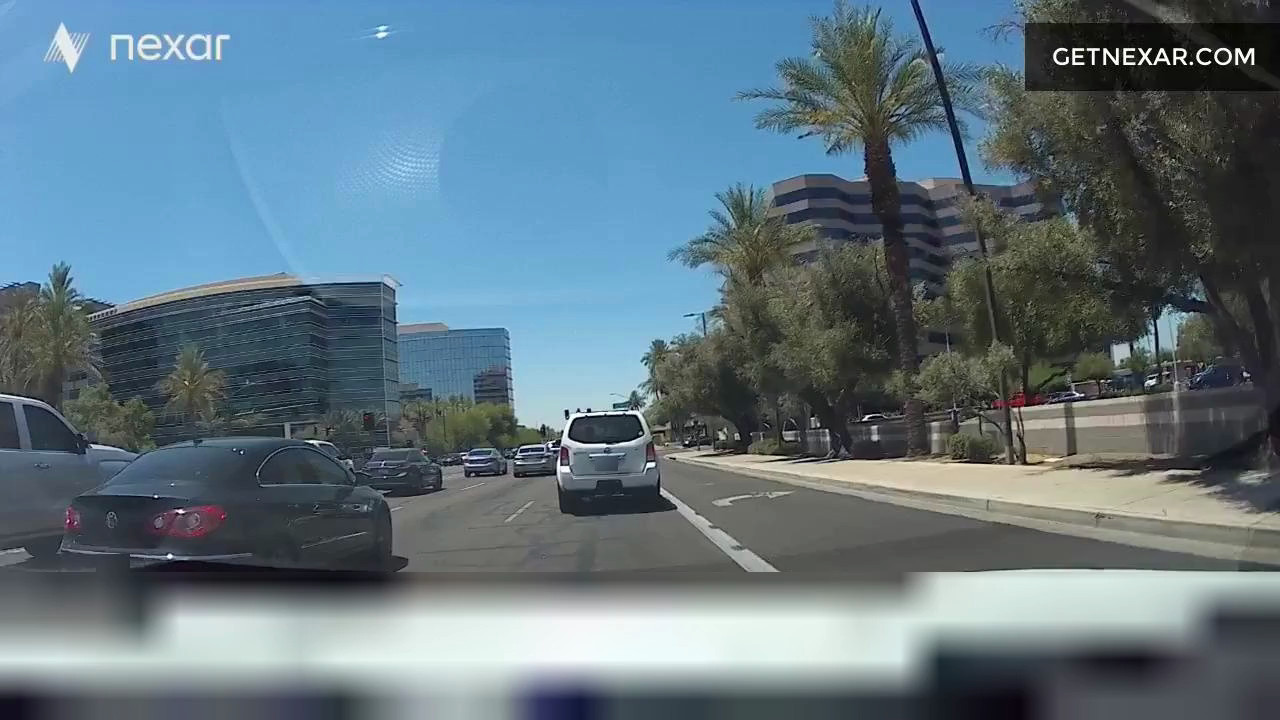
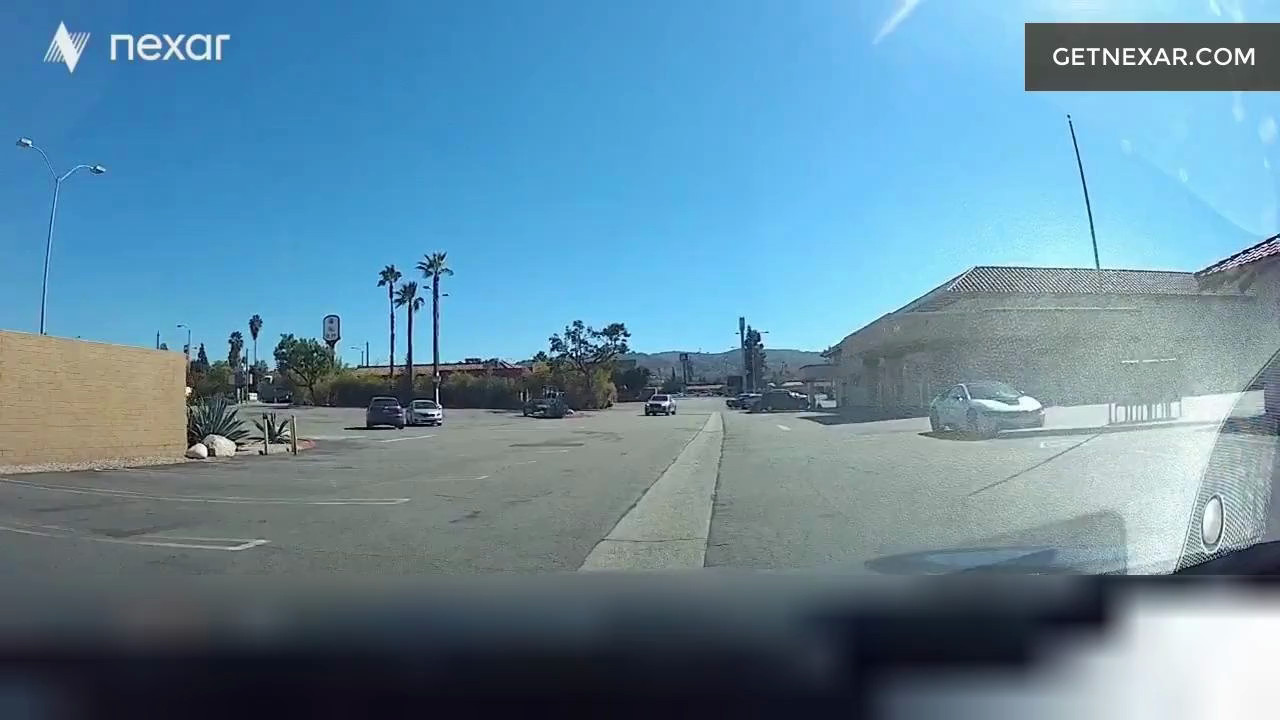
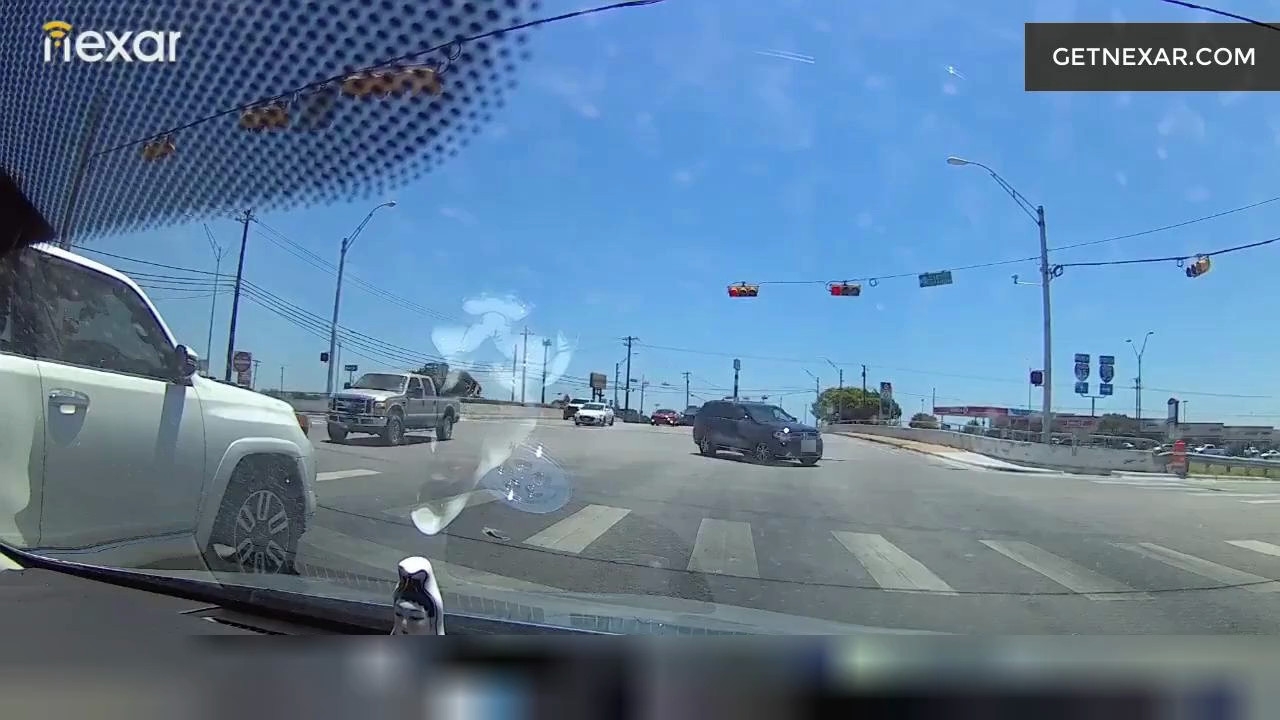

In [73]:
import json
pd.set_option("display.max_colwidth", None)

# Add the JSON response to the dataframe
df_response_json = df_response["response"].apply(lambda x: x.model_dump() if x is not None else None)
df_response_json = pd.concat([df_response, pd.json_normalize(df_response_json)], axis=1)

# Display the dataframe (with images, title, caption, page number)
cols = ["image", "response.description", "response.scene", "response.weather", "response.light_conditions"]
display(HTML(df_response_json[cols].to_html(formatters=formatters, escape=False)))

### Thanks for following along!

Head over to the [VLM Run App](https://app.vlm.run) to try out the [VLM Run](https://vlm.run) API for yourself!